# LEAD SCORING CASE STUDY.

## Problem Statement and GOAL of the Assignment.

Lead scoring case study is about a company called XEducation which sells online courses to the industry professionals. These courses are present in various avenues like websites, search engines like Google, past referrals etc. When people see about these courses or their website, they will read through these course details and fill out form withtheir email address/phone number. These type of people are essentially classified as leads.Once these leads are received by the company (interested people who had given their email address/phone number), their sales team will start making calls or emails to urge the people to take their courses. The company claims that their lead conversion rate is 30%. Now, the company claims that their lead conversion rate is very less. To increase their lead conversion rate, they have to identify more potential leads knows as "HOT LEADS". If they identify this HOT LEADS automatically their lead conversion rate will increase. 

Now, the GOAL of this case study is to identify those HOT LEADS that will help the company in making more revenue by joining their courses. We need to assign lead score to each of the HOT LEADS such that the customers with higher lead score have a higher conversion chance.

**STEPS FOLLOWED IN THIS ASSIGNMENT:**

1. Data Understanding. 
2. Data Cleaning. 
3. Data Exploration.
4. Data Preparation for Model building. 
5. Model Building and Evaluation. 

## Step1. Data Understanding.

In [295]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
# split train and test dataset
from sklearn.model_selection import train_test_split
# scaling
from sklearn.preprocessing import StandardScaler

# model building
import statsmodels.api as sm

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# confusion metrics
from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore') 

In [296]:
# import data
lead_df = pd.read_csv("Leads.csv")
lead_df_original = lead_df.copy() # for data retain calculation
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [297]:
#shape
lead_df.shape

(9240, 37)

In [298]:
#inspect the dataset
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

Observations:
- Most of the columns are categorical
- Website visit related informations are numerical


In [299]:
# describe
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Observations:
- In column "TotalVisitors" and "Pages Views per Visit", there is sudden change in 75% and max

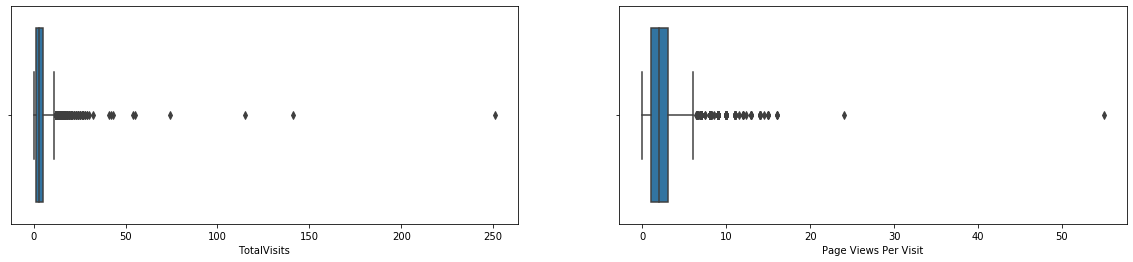

In [300]:
# inspect outlier in "Totalvisitors" and "Pages Views per Visit "
fig, axs = plt.subplots(1,2,figsize = [20,4])
sns.boxplot(lead_df['TotalVisits'], ax = axs[0])
sns.boxplot(lead_df['Page Views Per Visit'],ax =axs[1])
plt.show()

Observation:
- Cleary both columns have outliers
- It will be treated in EDA Section 

In [301]:
# Getting the column values. 

lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Step 2 : Data Cleaning

### SubTask 2.1 Dropping columns

- Few columns are to be filled by marketing person after contacting the person. Also called score variables which are listed below. 
    - Tags
    - Lead Quality
    - Lead Profile
    - Asymmetrique Activity Index
    - Asymmetrique Profile Index
    - Asymmetrique Activity Score
    - Asymmetrique Profile Score' 
- There are two columns named:
  - "Last Activity" - the lead was closed from the sales team side
  - "Last Notable Activity"- sales team representative is in touch with the lead.
  - Out of the above two , Last Activity should be dropped as lead has been closed.


In [302]:
# dropping columns 
col = ['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
       'Asymmetrique Profile Score','Tags','Lead Quality','Lead Profile','Last Activity']
lead_df.drop(col, axis = 1 , inplace = True)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Country                                          6779 non-null object
Specialization                                   7802 non-null object
How did you hear about X Education               7033 

### SubTask2.2: Missing value analysis 

Lets first get the column-wise percentage of missing values from our dataset. 

In [303]:
#Check the percentage missing value cloumnwise
100*lead_df.isnull().sum()/len(lead_df)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

**Observations:**
Based on the above code for getting the column-wise missing values percentages, we could see that there are three types of columns.
  - No missing values.
  - 1% missing values- it can either be imputted or correspondig rows 
can be deleted
  - Large percentage of missing values. Need to analyse further and look for reason for missing.

### Subtask 2.3: Inspecting and cleaning columns one by one.

#### Inspect column "Country" 

In [304]:

lead_df['Country'].value_counts(normalize = 1)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Nigeria                  0.059006
Kuwait                   0.059006
South Africa             0.059006
Canada                   0.059006
Germany                  0.059006
Sweden                   0.044254
Bangladesh               0.029503
China                    0.029503
Philippines              0.029503
Ghana                    0.029503
Uganda                   0.029503
Belgium                  0.029503
Asia/Pacific Region      0.029503
Italy                    0.029503
Netherlands              0.029503
Sri Lanka                0.014751
Russia        

Observation:
- It is a highly skewed data
- It can be dropped.

In [305]:
# drop country column
lead_df.drop('Country', axis = 1, inplace = True)

#### Inspect column "Lead Origin"

In [306]:
lead_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

**Observation:**
- there are no missing values in this variable.

#### Inspect column "Lead Source"

In [307]:
lead_df['Lead Source'].value_counts(normalize = True)* 100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Live Chat             0.021730
Press_Release         0.021730
Social Media          0.021730
youtubechannel        0.010865
testone               0.010865
welearnblog_Home      0.010865
blog                  0.010865
NC_EDM                0.010865
Pay per Click Ads     0.010865
WeLearn               0.010865
Name: Lead Source, dtype: float64

Observations:
- Majority of the values are in first four categories
- Google and google is been mentioned separately, need to merged.
- Other categories with small percentage should combine under one category named , 'Others' 

In [308]:
# merge Google and google as one identity
lead_df.loc[lead_df['Lead Source'] == 'google','Lead Source'] = 'Google' 


In [309]:
# combine all categories with small percentage (less than 2) in one category as "Other"
df1 = pd.DataFrame(lead_df['Lead Source'].value_counts(normalize = True)*100)
colList = df1[df1['Lead Source'] < 2].index
lead_df.loc[lead_df['Lead Source'].isin(colList),'Lead Source'] = 'Others'
lead_df['Lead Source'].value_counts(normalize = True)* 100


Google            31.214689
Direct Traffic    27.629292
Olark Chat        19.067797
Organic Search    12.538027
Reference          5.801825
Others             3.748370
Name: Lead Source, dtype: float64

In [310]:
#inspecting missing value
100*lead_df['Lead Source'].isnull().sum()/len(lead_df)

0.38961038961038963

Observation:
- Missing value is less than 1 %.
- Cannot be imputted by any values as it is not skewed column
- Dropping few rows is a better option. 

In [311]:
# drop rows
print("Number of rows before drop : ",lead_df.shape[0])
lead_df = lead_df[~(pd.isnull(lead_df['Lead Source']))]
print("Number of rows after drop : ",lead_df.shape[0])

Number of rows before drop :  9240
Number of rows after drop :  9204




#### Inspect column :"Do not Email"

In [312]:
lead_df['Do Not Email'].value_counts()

No     8483
Yes     721
Name: Do Not Email, dtype: int64

#### Inspect Column: "Do not call"

In [313]:
lead_df['Do Not Call'].value_counts()

No     9202
Yes       2
Name: Do Not Call, dtype: int64

Observation:
- Highly skewed
- It should be deleted.

In [314]:
# drop "Do not Call"
print("Number of columns in the input dataset before drop : ",lead_df.shape[1])
lead_df.drop('Do Not Call', axis = 1, inplace = True)
print("Number of columns in the input dataset after drop : ",lead_df.shape[1])

Number of columns in the input dataset before drop :  28
Number of columns in the input dataset after drop :  27


#### Inspect column: "TotalVisits"

In [315]:
# inpect missing values
print(lead_df['TotalVisits'].isnull().sum())
round(100*lead_df['TotalVisits'].isnull().sum()/len(lead_df),2)

130


1.41

Observation:
- Out of 9240 rows only 130 rows are having null value 
- 1.48% is a small percentage of missing values


In [316]:
# impute with median
lead_df.loc[np.isnan(lead_df['TotalVisits']),'TotalVisits'] = lead_df['TotalVisits'].quantile(0.5)
# check No of missing columns after impute
print(lead_df['TotalVisits'].isnull().sum())

0


#### Inspect column :"Total Time Spent On Website"




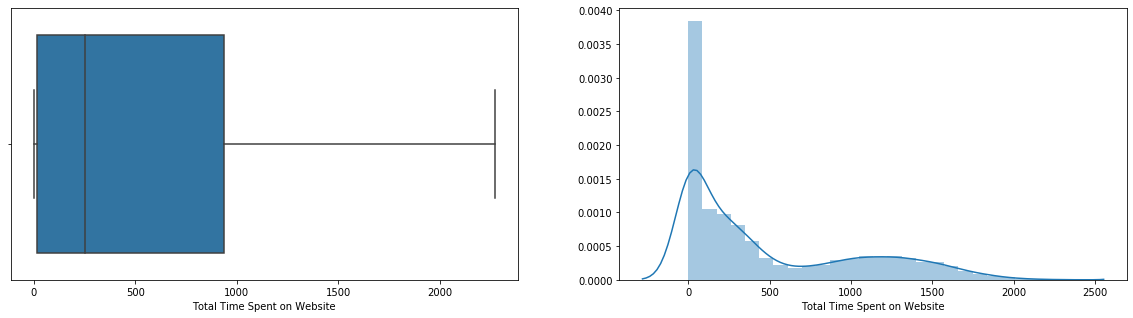

In [317]:
#  Since this is a numerical variable we will use the box plot to see the spread of data.
plt.figure(figsize =[20,5])
plt.subplot(1,2,1)
sns.boxplot(lead_df['Total Time Spent on Website']) 
plt.subplot(1,2,2)
sns.distplot(lead_df['Total Time Spent on Website'])
plt.show()

Observation:
- There is no Outlier and No missing value. SO we can proceed with the next variable. 




#### Inspect column: "Page Views Per Visit"

In [318]:
# inspect missing value
print(lead_df['Page Views Per Visit'].isnull().sum())
round(100*lead_df['Page Views Per Visit'].isnull().sum()/len(lead_df),2)

130


1.41

Observation:
- The column have missing values exactle same as "TotalVisits".
- Missing value is very low in percentage. 
- It can be imputed with median value.

In [319]:
# impute with median
lead_df.loc[np.isnan(lead_df['Page Views Per Visit']),'Page Views Per Visit'] = lead_df['Page Views Per Visit'].quantile(0.5)
# check No of missing columns after impute
print(lead_df['Page Views Per Visit'].isnull().sum())

0


#### Inspect column : Last Notable Activity

In [320]:
round(100*lead_df['Last Notable Activity'].value_counts(normalize = True),2)

Modified                        36.91
Email Opened                    30.67
SMS Sent                        23.38
Page Visited on Website          3.46
Olark Chat Conversation          1.99
Email Link Clicked               1.88
Email Bounced                    0.65
Unsubscribed                     0.49
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Email Received                   0.01
View in browser link Clicked     0.01
Form Submitted on Website        0.01
Resubscribed to emails           0.01
Approached upfront               0.01
Name: Last Notable Activity, dtype: float64

Observation: 
- Last few categories have very less weightage .
- They can be combined togther as one category named "Other". 

In [321]:
# combine all categories with small percentage (less than 1) in one category as "Other"
df1 = pd.DataFrame(lead_df['Last Notable Activity'].value_counts(normalize = True)*100)
colList = df1[df1['Last Notable Activity'] < 1].index
lead_df.loc[lead_df['Last Notable Activity'].isin(colList),'Last Notable Activity'] = 'Others'
lead_df['Last Notable Activity'].value_counts(normalize = True)* 100

Modified                   36.907866
Email Opened               30.671447
SMS Sent                   23.381139
Page Visited on Website     3.455020
Olark Chat Conversation     1.988266
Email Link Clicked          1.879618
Others                      1.716645
Name: Last Notable Activity, dtype: float64

In [322]:
# inspect missing value
100*lead_df['Last Notable Activity'].isnull().sum()/len(lead_df)

0.0

#### Inspect Column: "Specialization" 

In [323]:
# inspect the values in the column
round(100*lead_df['Specialization'].value_counts(normalize = True),2)

Select                               24.65
Finance Management                   12.53
Human Resource Management            10.91
Marketing Management                 10.78
Operations Management                 6.46
Business Administration               5.19
IT Projects Management                4.71
Supply Chain Management               4.49
Banking, Investment And Insurance     4.35
Media and Advertising                 2.61
Travel and Tourism                    2.61
International Business                2.29
Healthcare Management                 2.03
Hospitality Management                1.47
E-COMMERCE                            1.43
Retail Management                     1.29
Rural and Agribusiness                0.94
E-Business                            0.73
Services Excellence                   0.52
Name: Specialization, dtype: float64

Observation:
- A value "Select" has no meaning, it can be treated as null.


In [324]:
# convert select to null
lead_df['Specialization'] = lead_df['Specialization'].replace("Select", np.nan)
round(100*lead_df['Specialization'].value_counts(normalize = True),2)

Finance Management                   16.63
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.89
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.78
Media and Advertising                 3.47
Travel and Tourism                    3.47
International Business                3.04
Healthcare Management                 2.70
Hospitality Management                1.95
E-COMMERCE                            1.90
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64

Observation :
- All select value is convertred to null
- Inspect the null percentage in the column.

In [325]:
100*lead_df['Specialization'].isnull().sum()/len(lead_df)

36.418948283355064

Observation:
- 36% value is missing. Its a huge value.
- We cannot delete that much rows to treate Null 
- So all Null values should be filled with 'NA'.

In [326]:
lead_df['Specialization'].fillna("NA",inplace = True)

#verify missing again
100*lead_df['Specialization'].isnull().sum()/len(lead_df)

0.0

Observation:
- All missing missing is filled with 'NA'
- No more missing value.

In [327]:
# inspect the value again
lead_df['Specialization'].value_counts(normalize = True)* 100

NA                                   36.418948
Finance Management                   10.571491
Human Resource Management             9.202521
Marketing Management                  9.093872
Operations Management                 5.454150
Business Administration               4.378531
IT Projects Management                3.976532
Supply Chain Management               3.791830
Banking, Investment And Insurance     3.672316
Media and Advertising                 2.205563
Travel and Tourism                    2.205563
International Business                1.933942
Healthcare Management                 1.716645
Hospitality Management                1.238592
E-COMMERCE                            1.205997
Retail Management                     1.086484
Rural and Agribusiness                0.793133
E-Business                            0.619296
Services Excellence                   0.434594
Name: Specialization, dtype: float64

#### Inspect column : "How did you hear about X Education"

In [328]:
100 *lead_df['How did you hear about X Education'].value_counts(normalize = True)

Select                   71.587823
Online Search            11.547806
Word Of Mouth             4.959268
Student of SomeSchool     4.430470
Other                     2.658282
Multiple Sources          2.172360
Advertisements            1.000429
Social Media              0.943261
Email                     0.371588
SMS                       0.328712
Name: How did you hear about X Education, dtype: float64

Observation:
- A very large percentage is having value as "Select", which is actually a missing value.
- with 71% missing values, drop column itself.

In [329]:
# drop "How did you hear about X Education"
lead_df.drop('How did you hear about X Education', axis = 1, inplace= True)

#### Inspect column "What matters most to you in chossing a course:"

In [330]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6492
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Observation :
- It is a higly skewed column
- It should be dropped.

In [331]:
# drop "What matters most to you in choosing a course"
lead_df.drop('What matters most to you in choosing a course',axis = 1, inplace = True)

#### Inspect Column: "Search"

In [332]:
lead_df["Search"].value_counts(normalize = True)*100

No     99.847892
Yes     0.152108
Name: Search, dtype: float64

Observation:
- It is a highly skewed data.More than 99.8 % is same value.
- This should be dropped.


In [333]:
# drop "Search"
lead_df.drop('Search', axis = 1, inplace = True)

#### Inspect Column : All advertisement columns are taking togther:
- 'Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'

In [334]:
# inspecting their values
for column in ['Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']:
  print(lead_df[column].value_counts(normalize = True)* 100)

No    100.0
Name: Magazine, dtype: float64
No     99.97827
Yes     0.02173
Name: Newspaper Article, dtype: float64
No     99.989135
Yes     0.010865
Name: X Education Forums, dtype: float64
No     99.989135
Yes     0.010865
Name: Newspaper, dtype: float64
No     99.956541
Yes     0.043459
Name: Digital Advertisement, dtype: float64
No     99.923946
Yes     0.076054
Name: Through Recommendations, dtype: float64


Observation:
- All the columns are highly skewed, some are 100 percent skewed. 
- Not relevant , should be dropped.

In [335]:
# drop 'Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'
lead_df.drop(['Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'], axis = 1 , inplace = True)

In [336]:
# inspect the dropping action
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 18 columns):
Prospect ID                                 9204 non-null object
Lead Number                                 9204 non-null int64
Lead Origin                                 9204 non-null object
Lead Source                                 9204 non-null object
Do Not Email                                9204 non-null object
Converted                                   9204 non-null int64
TotalVisits                                 9204 non-null float64
Total Time Spent on Website                 9204 non-null int64
Page Views Per Visit                        9204 non-null float64
Specialization                              9204 non-null object
What is your current occupation             6514 non-null object
Receive More Updates About Our Courses      9204 non-null object
Update me on Supply Chain Content           9204 non-null object
Get updates on DM Content                   9204 

#### Inspect Columns: Next Three columns are on how student should receive updates.
- 'Receive More Updates About Our Courses'
- 'Update me on Supply Chain Content' 
- 'Get updates on DM Content

In [337]:
# inspect value in those 3 columns
for column in ['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content']:
  print(lead_df[column].value_counts(normalize = True)*100)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64
No    100.0
Name: Update me on Supply Chain Content, dtype: float64
No    100.0
Name: Get updates on DM Content, dtype: float64


Observation: 
- All three columns are 100 per cent skewed.
- All three should be dropped.

In [338]:
# dropping 'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content columns
lead_df.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'], axis = 1, inplace = True)

#### Inspect Column: "City"

In [339]:
lead_df['City'].value_counts(normalize = True)*100

Mumbai                         41.366906
Select                         28.494347
Thane & Outskirts               9.647996
Other Cities                    8.812950
Other Cities of Maharashtra     5.858171
Other Metro Cities              4.868962
Tier II Cities                  0.950668
Name: City, dtype: float64

Observation:
- Once again "Select" symbolises is missing value.
- Convert all select into null 

In [340]:
# convert select in ot null
lead_df['City'] = lead_df['City'].replace("Select", np.nan)
lead_df['City'].value_counts(normalize = True)*100

Mumbai                         57.851240
Thane & Outskirts              13.492634
Other Cities                   12.324829
Other Cities of Maharashtra     8.192598
Other Metro Cities              6.809199
Tier II Cities                  1.329501
Name: City, dtype: float64

In [341]:
# inspect missing value in City
round(100*lead_df['City'].isnull().sum()/len(lead_df),2)

39.53

Observation:
- It is very high percentage of missing values almost 40%.
- Since it is an Online class, location may not be business issues.
- Lets drop this column.

In [342]:
# drop city
lead_df.drop('City', axis = 1, inplace = True)


#### Inspect Column "I agree to pay the amount through cheque"

In [343]:
# inspect the value
lead_df['I agree to pay the amount through cheque'].value_counts()

No    9204
Name: I agree to pay the amount through cheque, dtype: int64

Observation:
- Just having one value, 100% skewed.
- Drop this column

In [344]:
# drop "I agree to pay the amount through cheque"
lead_df.drop("I agree to pay the amount through cheque", axis = 1,inplace = True)

#### Inspect Column "A free copy of Mastering The Interview"

In [345]:
# inspect value in column
lead_df['A free copy of Mastering The Interview'].value_counts()

No     6316
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### Inspect column: "'What is your current occupation"

In [346]:
# inspect Values
100*lead_df['What is your current occupation'].value_counts(normalize = True)

Unemployed              85.462082
Working Professional    10.807492
Student                  3.208474
Other                    0.245625
Housewife                0.153516
Businessman              0.122812
Name: What is your current occupation, dtype: float64

Observation:
- This is also a skewed column , but not that high.
- Combine the values which are less than one percent as "Other"

In [347]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace({"Housewife":"Other","Businessman":"Other"})

#inspect gain
lead_df['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              85.462082
Working Professional    10.807492
Student                  3.208474
Other                    0.521953
Name: What is your current occupation, dtype: float64

In [348]:
# inspect missing value
round(100*lead_df['What is your current occupation'].isnull().sum()/len(lead_df),2)

29.23

Observation:
- column has high percentage of missing value.
- It is categorical column 
- not having a proper value to impute. 

- drop the corresponding rows 

 

In [349]:
lead_df = lead_df[~pd.isnull(lead_df['What is your current occupation'])]
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 13 columns):
Prospect ID                               6514 non-null object
Lead Number                               6514 non-null int64
Lead Origin                               6514 non-null object
Lead Source                               6514 non-null object
Do Not Email                              6514 non-null object
Converted                                 6514 non-null int64
TotalVisits                               6514 non-null float64
Total Time Spent on Website               6514 non-null int64
Page Views Per Visit                      6514 non-null float64
Specialization                            6514 non-null object
What is your current occupation           6514 non-null object
A free copy of Mastering The Interview    6514 non-null object
Last Notable Activity                     6514 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 712.5+ KB


#### Final inspection of  Missing values 

In [350]:

round(100*lead_df.isnull().sum()/len(lead_df),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#### Percentage of rows retained:


In [351]:
retain_percent = round(100 *len(lead_df)/len(lead_df_original),2)
print("retained percentage of rows :",retain_percent)

retained percentage of rows : 70.5


#### Check data is imbalance or not


In [352]:
lead_df['Converted'].value_counts()

0    3352
1    3162
Name: Converted, dtype: int64

Observation:
- Dataset is balanced

## Step 3. Exploratory Data Analysis:

In this step, we will analyse the data (both numerical and categorical) and visualize them to see how the data is spread. We will do 
- Univariate Analysis 
- Bivariate Analysis (w.r.t target variable)
- Heat map to get the correlation between the numerical variables

We will first look at the spread of all the variables through various graphs/plots and then make our analysis on the data spread. 

### Univariate Analysis of Numerical Variables:

#### Inspect column: Total Visits Variable:

In [353]:
# inspect outlier
lead_df['TotalVisits'].describe()

count    6514.000000
mean        3.608382
std         4.995776
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

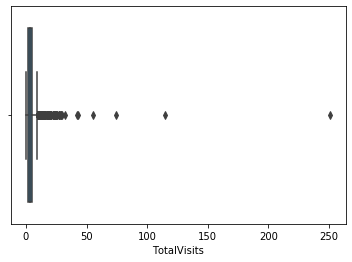

In [354]:
# inspect outlier
sns.boxplot(lead_df['TotalVisits'])
plt.show()

Observation:
- We can see outliers in the data
- Visitor having high number of visits are important for business, should not be removed, can be capped.  

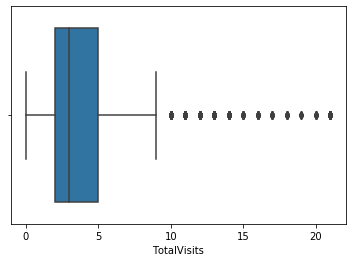

In [355]:
# capping
lead_df.loc[lead_df['TotalVisits'] > lead_df['TotalVisits'].quantile(0.995),"TotalVisits"] = lead_df['TotalVisits'].quantile(0.995)
sns.boxplot(lead_df['TotalVisits'])
plt.show()

In this variable, we have treated the outliers by capping them with quantile values.

#### Inspect column: Page Views Per Visit variable:

In [356]:
# inspect outliers
lead_df['Page Views Per Visit'].describe()

count    6514.000000
mean        2.468836
std         2.145739
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        55.000000
Name: Page Views Per Visit, dtype: float64

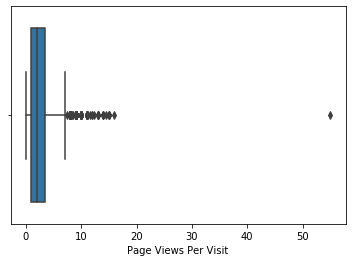

In [357]:
# inspect outliers
sns.boxplot(lead_df['Page Views Per Visit'])

Observation:
- We can see outliers in the data
- Visitor who have number of page views in their every visit is an important variable in the business sense, so they should not be removed but can be capped as outlier treatment.  

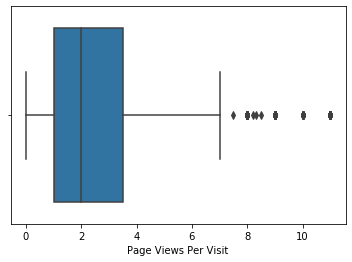

In [358]:
# capping 
lead_df.loc[lead_df['Page Views Per Visit'] > lead_df['Page Views Per Visit'].quantile(0.995),"Page Views Per Visit"] = lead_df['Page Views Per Visit'].quantile(0.995)
sns.boxplot(lead_df['Page Views Per Visit'])

We have now treated the outliers in this variable.

#### Inspect column :"Total Time Spent On Website"

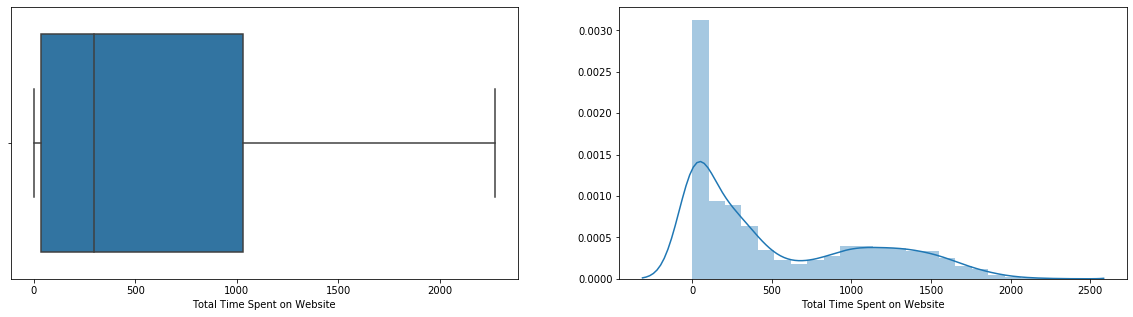

In [359]:
plt.figure(figsize =[20,5])
plt.subplot(1,2,1)
sns.boxplot(lead_df['Total Time Spent on Website']) 
plt.subplot(1,2,2)
sns.distplot(lead_df['Total Time Spent on Website'])
plt.show()

**Observation:**
- There is no Outlier and No missing value.

#### Numerical Numerical Bivariate Analysis.

We will check the correlation between the numerical variables that we have. It is required check because they tell us whether any independent variable is related to someother independent variable. This needs to figured out toaddress the multi collinearity issue.

In [361]:
# Lets first plot the correlation matrix for our data. 

leads_num_vars = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

corr=lead_df[leads_num_vars].corr()
corr

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.007360,0.321016,-0.063357
TotalVisits,0.007360,1.000000,0.301431,0.670071
Total Time Spent on Website,0.321016,0.301431,1.000000,0.316611
Page Views Per Visit,-0.063357,0.670071,0.316611,1.000000


When we see the correlation matrix, it could be understood that the correlation is not much between the converted (target) variable and the other predictor variables.

We can see that the maximum correlation 0.31 is between Converted and Total time spent by that customer in the website. It makes sense because, a customer/client who is interested in courses would only be spending more time in the website.
Meanwhile, when we see the Converted and Page views per visit isnegatively correlated. We cant derive anything from this correlation because, the page views per visit is the average number of page viewed in the website during a visit.

Lets now plot heatmap and check the correlation visually.

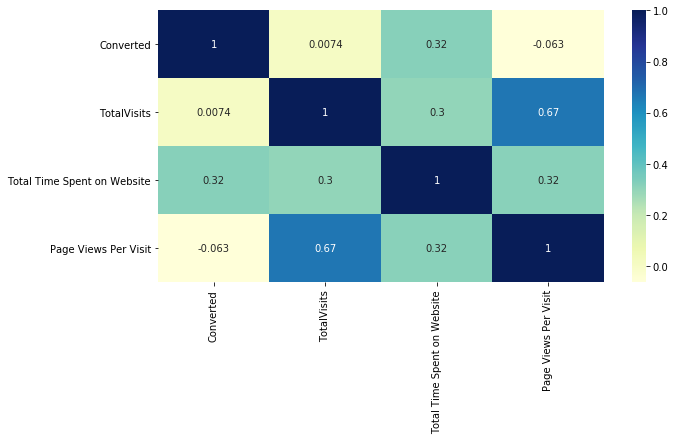

In [212]:
plt.figure(figsize=(10,5))

lead_df_temp = lead_df.drop('Lead Number', axis=1)

ax = sns.heatmap(lead_df_temp.corr(),cmap="YlGnBu", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

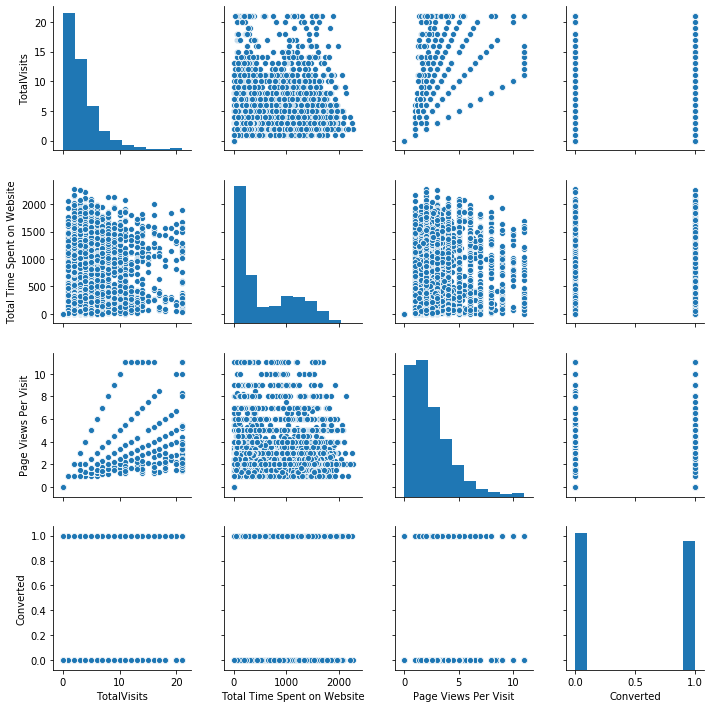

In [213]:
# scatter plot
sns.pairplot(lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']])
plt.show()

#### Bivariate Analysis - Categorical w.r.t Target variable. 

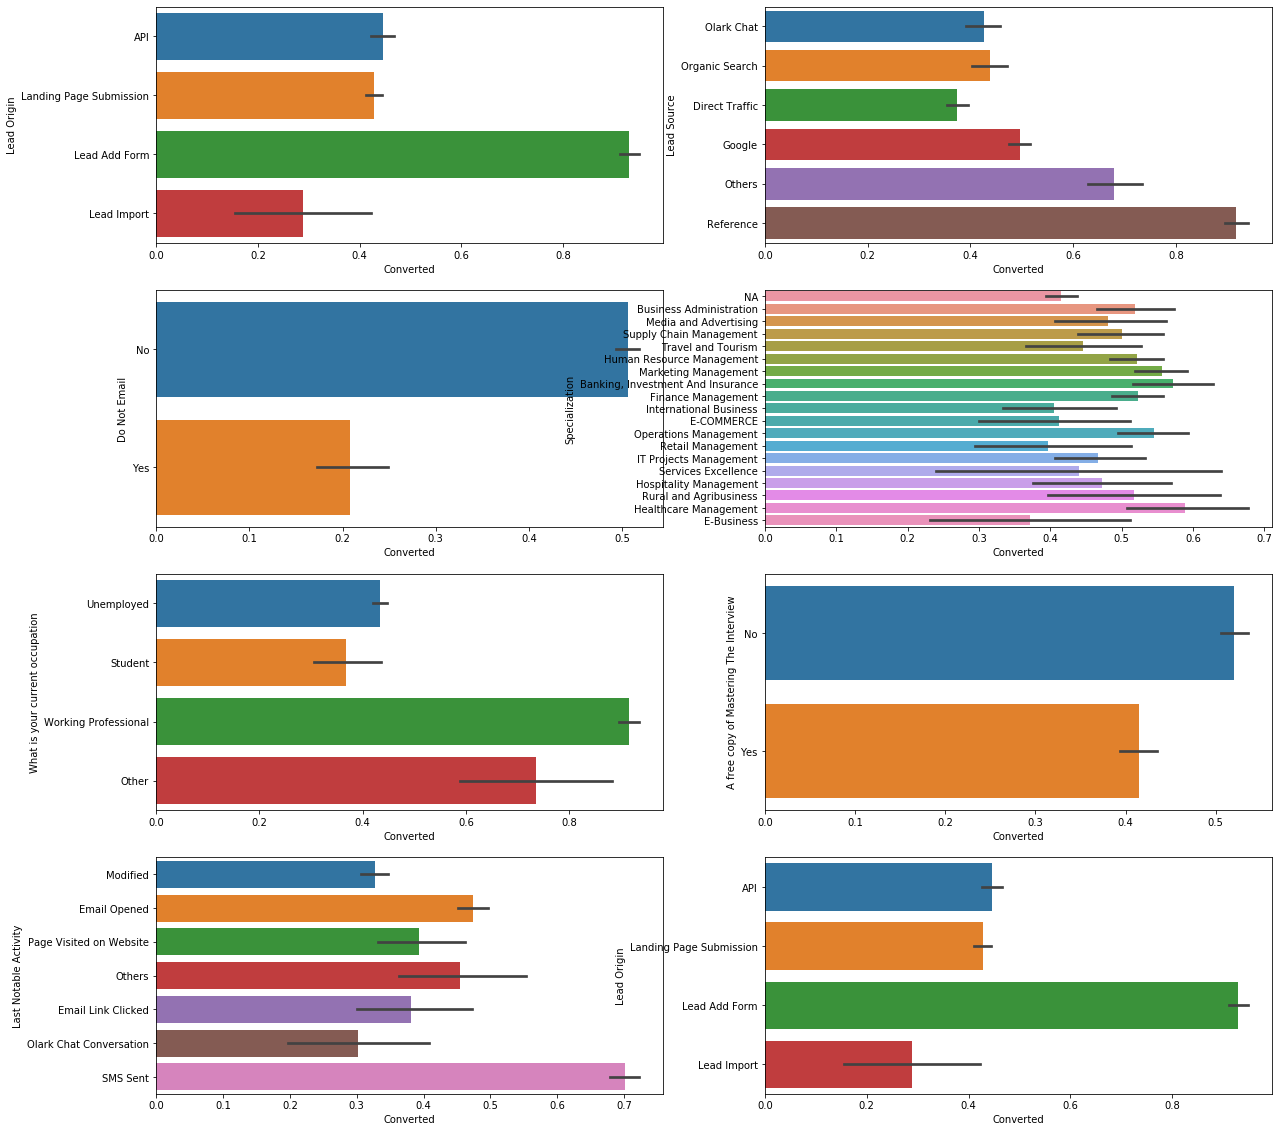

In [363]:
cat_col = [['Lead Origin','Lead Source'],['Do Not Email','Specialization'],['What is your current occupation',
           'A free copy of Mastering The Interview'],['Last Notable Activity','Lead Origin']]
fig, axs = plt.subplots(4,2,figsize = [20,20])
for i in range(len(cat_col)):
  for j in range(2):
    sns.barplot(y = lead_df[cat_col[i][j]], x = lead_df['Converted'], ax = axs[i,j])
plt.show()

From the above plots for the categorical variables w.r.t to the target variable, the following inferences were made.

- Most of the leads have filled the Lead Origin_leads add form which id the form that the lead fills with their email address before they actually visit the webpage. 
- Most of leads who visited the webpage/showed interest are the one's who came through referral.
- Most of the leads have asked not to email them.
- Working professionals constitute  a large amount of leads.

## Step 4. Data Preparation

Before we do any modelling process, we need to prepare the data for the model building. We need to follow the below steps for the model building process.

- **Dummy variable creation**: 
    - When we train our model to analyse/predict certain results, the machine learning algorithm's needs all the data in the binary vectore representation. Hence it is important that we convert our categorical data( which usually has readable categories for the various row values) to numerical/binary data (in 0's, 1's, 2's etc based on the number of categories) before feeding them as the input to the machine learning algorithm.Such a process is called the Dummy variable encoding/One-Hot Encoding. In One Hot encoding, we represent the various categories of the particular column in binary vector representation (in 0's and 1's) that does not have any issue with ordinality. But there is a problem of redundancy of a predictor feature in One-Hot encoding. To over come that we will use Dummy variable encoding by giving drop_first=True or mentione the specific featire that needs to be dropped before proceeding with the model building. 
- **Train-Test Split**:
   - When we have a data, it is important that we not use the entire data in model building. Because, then we will have not have data to test the model that we had built using specific algorithm, to see whether the model is performing well, whether there are any over fitting issues etc. Hence we split our main input data into 2 parts: Train data and Test data in the ration of 70-30 or 80-20. After plitting the data, we use the train data to do feature scaling (process of bringing all the numerical variables into one single scale), train the model using our regression/classification algorithm and see the various resulting factors. Once we see the get the required output, we will run this model with the test data so see whether our result matches with the train data. This is a way to check whether our model is performing well. 
- **Feature scaling for Train data**: 
   - In our input data, we will always have numerical as well as categorical data. As the ML algorithms can process only binary/numerical data, we convert the categorical data into binary representation using the dummy encoding process. Similarly, we need to treat numerical data also before feeding them to the ML algorithm. This is done because, the various numerical features in our data will have different range of values. For e.g. Income will have higher range of values from thousands to lakhs whereas number of children will range only from 0 to maximum 5 or 10. Hence is it important that we bring all this numerical data to a single scale so that the model that be buid is a optimal one and for easier interpretebility. Thisprocess is called feature scaling and is done by either of 2 methods **Normalization or Standardization**.  
       - Normalization: Feature Scaling when we bring all the numerical data between 0 and 1.
       - Standardization: Feature Scaling when we bring all the numerical data to be centered around mean with a standard deviation of 1.
   - Feature Scaling is done only for the training dataset. This is because we learn from the training dataset and we test them in test data. We dont learn anything from the test data. Hence as part of feature scaling, we will standardizeor normalize the training dataset with training set's mean and standard deviation. And then we will use this standardized model in any test data using the **training sets** mean and standard deviation.
   
Lets now start with the Dummy variableCreation for the Categorical variables:

In [215]:
# The first two column "Prospect Id" and "Lead Number" is not important during modelling , lets drop these two columns
lead_df.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 11 columns):
Lead Origin                               6514 non-null object
Lead Source                               6514 non-null object
Do Not Email                              6514 non-null object
Converted                                 6514 non-null int64
TotalVisits                               6514 non-null float64
Total Time Spent on Website               6514 non-null int64
Page Views Per Visit                      6514 non-null float64
Specialization                            6514 non-null object
What is your current occupation           6514 non-null object
A free copy of Mastering The Interview    6514 non-null object
Last Notable Activity                     6514 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 930.7+ KB


### Subtask 4.1 Dummy variables

In [216]:
#inspect Lead Origin before crating dummy variables
lead_df['Lead Origin'].value_counts()

Landing Page Submission    3643
API                        2141
Lead Add Form               685
Lead Import                  45
Name: Lead Origin, dtype: int64

In [217]:
# creating dummy variables
df1 = pd.get_dummies(lead_df['Lead Origin'])

# Lead Import has very less value , lets drop that
df1.drop('Lead Import', axis = 1, inplace = True)

#concat
lead_df = pd.concat([lead_df,df1],axis = 1)

#inspect
lead_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 14 columns):
Lead Origin                               6514 non-null object
Lead Source                               6514 non-null object
Do Not Email                              6514 non-null object
Converted                                 6514 non-null int64
TotalVisits                               6514 non-null float64
Total Time Spent on Website               6514 non-null int64
Page Views Per Visit                      6514 non-null float64
Specialization                            6514 non-null object
What is your current occupation           6514 non-null object
A free copy of Mastering The Interview    6514 non-null object
Last Notable Activity                     6514 non-null object
API                                       6514 non-null uint8
Landing Page Submission                   6514 non-null uint8
Lead Add Form                             6514 non-null uint8
dtypes: float6

Observation:
- Three new dummy variables has been created.
- No of columns increased to 13

In [218]:
# dummy variable for "Lead Source"
# inspect before creating dummy variables
lead_df['Lead Source'].value_counts()

Google            2048
Direct Traffic    1891
Olark Chat         893
Organic Search     870
Reference          534
Others             278
Name: Lead Source, dtype: int64

In [219]:
# creat dummy variables for Lead Source
df1 = pd.get_dummies(lead_df['Lead Source'])

# "Others" doesnt give any sense , lets drop that
df1.drop('Others', axis = 1, inplace = True)

#concat
lead_df = pd.concat([lead_df,df1],axis = 1)

#inspect
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 19 columns):
Lead Origin                               6514 non-null object
Lead Source                               6514 non-null object
Do Not Email                              6514 non-null object
Converted                                 6514 non-null int64
TotalVisits                               6514 non-null float64
Total Time Spent on Website               6514 non-null int64
Page Views Per Visit                      6514 non-null float64
Specialization                            6514 non-null object
What is your current occupation           6514 non-null object
A free copy of Mastering The Interview    6514 non-null object
Last Notable Activity                     6514 non-null object
API                                       6514 non-null uint8
Landing Page Submission                   6514 non-null uint8
Lead Add Form                             6514 non-null uint8
Direct Traffic

Observation:
- Five new dummy variables has been created.
- No of columns increased to 18

In [220]:
# dummy variable for "Specialization"
# inspect the column before vreating dummy variable
lead_df["Specialization"].value_counts()

NA                                   1919
Finance Management                    759
Marketing Management                  677
Human Resource Management             675
Operations Management                 394
Business Administration               314
IT Projects Management                278
Supply Chain Management               278
Banking, Investment And Insurance     269
Media and Advertising                 162
Travel and Tourism                    150
International Business                138
Healthcare Management                 124
Hospitality Management                 93
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: Specialization, dtype: int64

In [221]:
# creat dummy variables for Lead Source
df1 = pd.get_dummies(lead_df['Specialization'])

# "NA" doesnt give any sense , lets drop that
df1.drop('NA', axis = 1, inplace = True)

#concat
lead_df = pd.concat([lead_df,df1],axis = 1)

#inspect
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 37 columns):
Lead Origin                               6514 non-null object
Lead Source                               6514 non-null object
Do Not Email                              6514 non-null object
Converted                                 6514 non-null int64
TotalVisits                               6514 non-null float64
Total Time Spent on Website               6514 non-null int64
Page Views Per Visit                      6514 non-null float64
Specialization                            6514 non-null object
What is your current occupation           6514 non-null object
A free copy of Mastering The Interview    6514 non-null object
Last Notable Activity                     6514 non-null object
API                                       6514 non-null uint8
Landing Page Submission                   6514 non-null uint8
Lead Add Form                             6514 non-null uint8
Direct Traffic

Observation:
- Eighteen new dummy variables has been created.
- No of columns increased to 36

In [222]:
# dummy variable for "What is your current occupation"
# inspect the column before vreating dummy variable
lead_df["What is your current occupation"].value_counts()

Unemployed              5567
Working Professional     704
Student                  209
Other                     34
Name: What is your current occupation, dtype: int64

In [223]:
# creat dummy variables for Lead Source
df1 = pd.get_dummies(lead_df['What is your current occupation'])

# "Other" doesnt give any sense , lets drop that
df1.drop('Other', axis = 1, inplace = True)

#concat
lead_df = pd.concat([lead_df,df1],axis = 1)

#inspect
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 40 columns):
Lead Origin                               6514 non-null object
Lead Source                               6514 non-null object
Do Not Email                              6514 non-null object
Converted                                 6514 non-null int64
TotalVisits                               6514 non-null float64
Total Time Spent on Website               6514 non-null int64
Page Views Per Visit                      6514 non-null float64
Specialization                            6514 non-null object
What is your current occupation           6514 non-null object
A free copy of Mastering The Interview    6514 non-null object
Last Notable Activity                     6514 non-null object
API                                       6514 non-null uint8
Landing Page Submission                   6514 non-null uint8
Lead Add Form                             6514 non-null uint8
Direct Traffic

Observation:
- Three new dummy variables has been created.
- No of columns increased to 39

In [224]:
#  dummy variable for "Last Notable Activity"
#inspect "Last Notable Activity" before creating dummy variables
lead_df['Last Notable Activity'].value_counts()

Modified                   2086
Email Opened               2038
SMS Sent                   1869
Page Visited on Website     214
Others                      121
Email Link Clicked          110
Olark Chat Conversation      76
Name: Last Notable Activity, dtype: int64

In [225]:
# creat dummy variables for Lead Source
df1 = pd.get_dummies(lead_df['Last Notable Activity'])

# "Others" doesnt give any sense , lets drop that
df1.drop('Others', axis = 1, inplace = True)

#concat
lead_df = pd.concat([lead_df,df1],axis = 1)

#inspect
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 46 columns):
Lead Origin                               6514 non-null object
Lead Source                               6514 non-null object
Do Not Email                              6514 non-null object
Converted                                 6514 non-null int64
TotalVisits                               6514 non-null float64
Total Time Spent on Website               6514 non-null int64
Page Views Per Visit                      6514 non-null float64
Specialization                            6514 non-null object
What is your current occupation           6514 non-null object
A free copy of Mastering The Interview    6514 non-null object
Last Notable Activity                     6514 non-null object
API                                       6514 non-null uint8
Landing Page Submission                   6514 non-null uint8
Lead Add Form                             6514 non-null uint8
Direct Traffic

Observation:

- Six new dummy variables has been created.
- No of columns increased to 45

Drop all the main columns whose dummy variables are created.


In [226]:
lead_df.drop(['Lead Origin','Lead Source','Specialization','What is your current occupation','Last Notable Activity'],axis = 1, inplace = True)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 41 columns):
Do Not Email                              6514 non-null object
Converted                                 6514 non-null int64
TotalVisits                               6514 non-null float64
Total Time Spent on Website               6514 non-null int64
Page Views Per Visit                      6514 non-null float64
A free copy of Mastering The Interview    6514 non-null object
API                                       6514 non-null uint8
Landing Page Submission                   6514 non-null uint8
Lead Add Form                             6514 non-null uint8
Direct Traffic                            6514 non-null uint8
Google                                    6514 non-null uint8
Olark Chat                                6514 non-null uint8
Organic Search                            6514 non-null uint8
Reference                                 6514 non-null uint8
Banking, Investment


### Subtask 4.2 Mapping yes/ no type variable
- "Do Not Email" and "A free copy of Mastering The Interview" columns having yes/ no type values . So no need to create dummy variables for them .<br>
- Map "yes" to '1' and "no" to '0' 

In [227]:
# mapping 
lead_df['Do Not Email'] = lead_df['Do Not Email'].map({"Yes":1,"No":0})
lead_df['A free copy of Mastering The Interview'] = lead_df['A free copy of Mastering The Interview'].map({"Yes":1,"No":0})


In [228]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 41 columns):
Do Not Email                              6514 non-null int64
Converted                                 6514 non-null int64
TotalVisits                               6514 non-null float64
Total Time Spent on Website               6514 non-null int64
Page Views Per Visit                      6514 non-null float64
A free copy of Mastering The Interview    6514 non-null int64
API                                       6514 non-null uint8
Landing Page Submission                   6514 non-null uint8
Lead Add Form                             6514 non-null uint8
Direct Traffic                            6514 non-null uint8
Google                                    6514 non-null uint8
Olark Chat                                6514 non-null uint8
Organic Search                            6514 non-null uint8
Reference                                 6514 non-null uint8
Banking, Investment A

### Subtask 4.3 Test train Split

In [229]:
y = lead_df.pop('Converted')
X = lead_df

In [230]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 50) 

In [231]:
# inspect size of train dataset
X_train.shape

(4559, 40)

### SubTask 4.4 Scaling

In [232]:
# instantiate StandardScaler
scaler = StandardScaler()
num_col = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website'] 
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_train.head()



,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,...,Travel and Tourism,Student,Unemployed,Working Professional,Email Link Clicked,Email Opened,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent
442,0,-0.139931,-0.832361,0.291846,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5916,0,-1.031329,-0.945690,-1.219285,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1814,0,-0.139931,0.398331,0.291846,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3687,0,-1.031329,-0.945690,-1.219285,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
717,0,-0.437063,-0.931524,-0.211864,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


Looking at Correlations

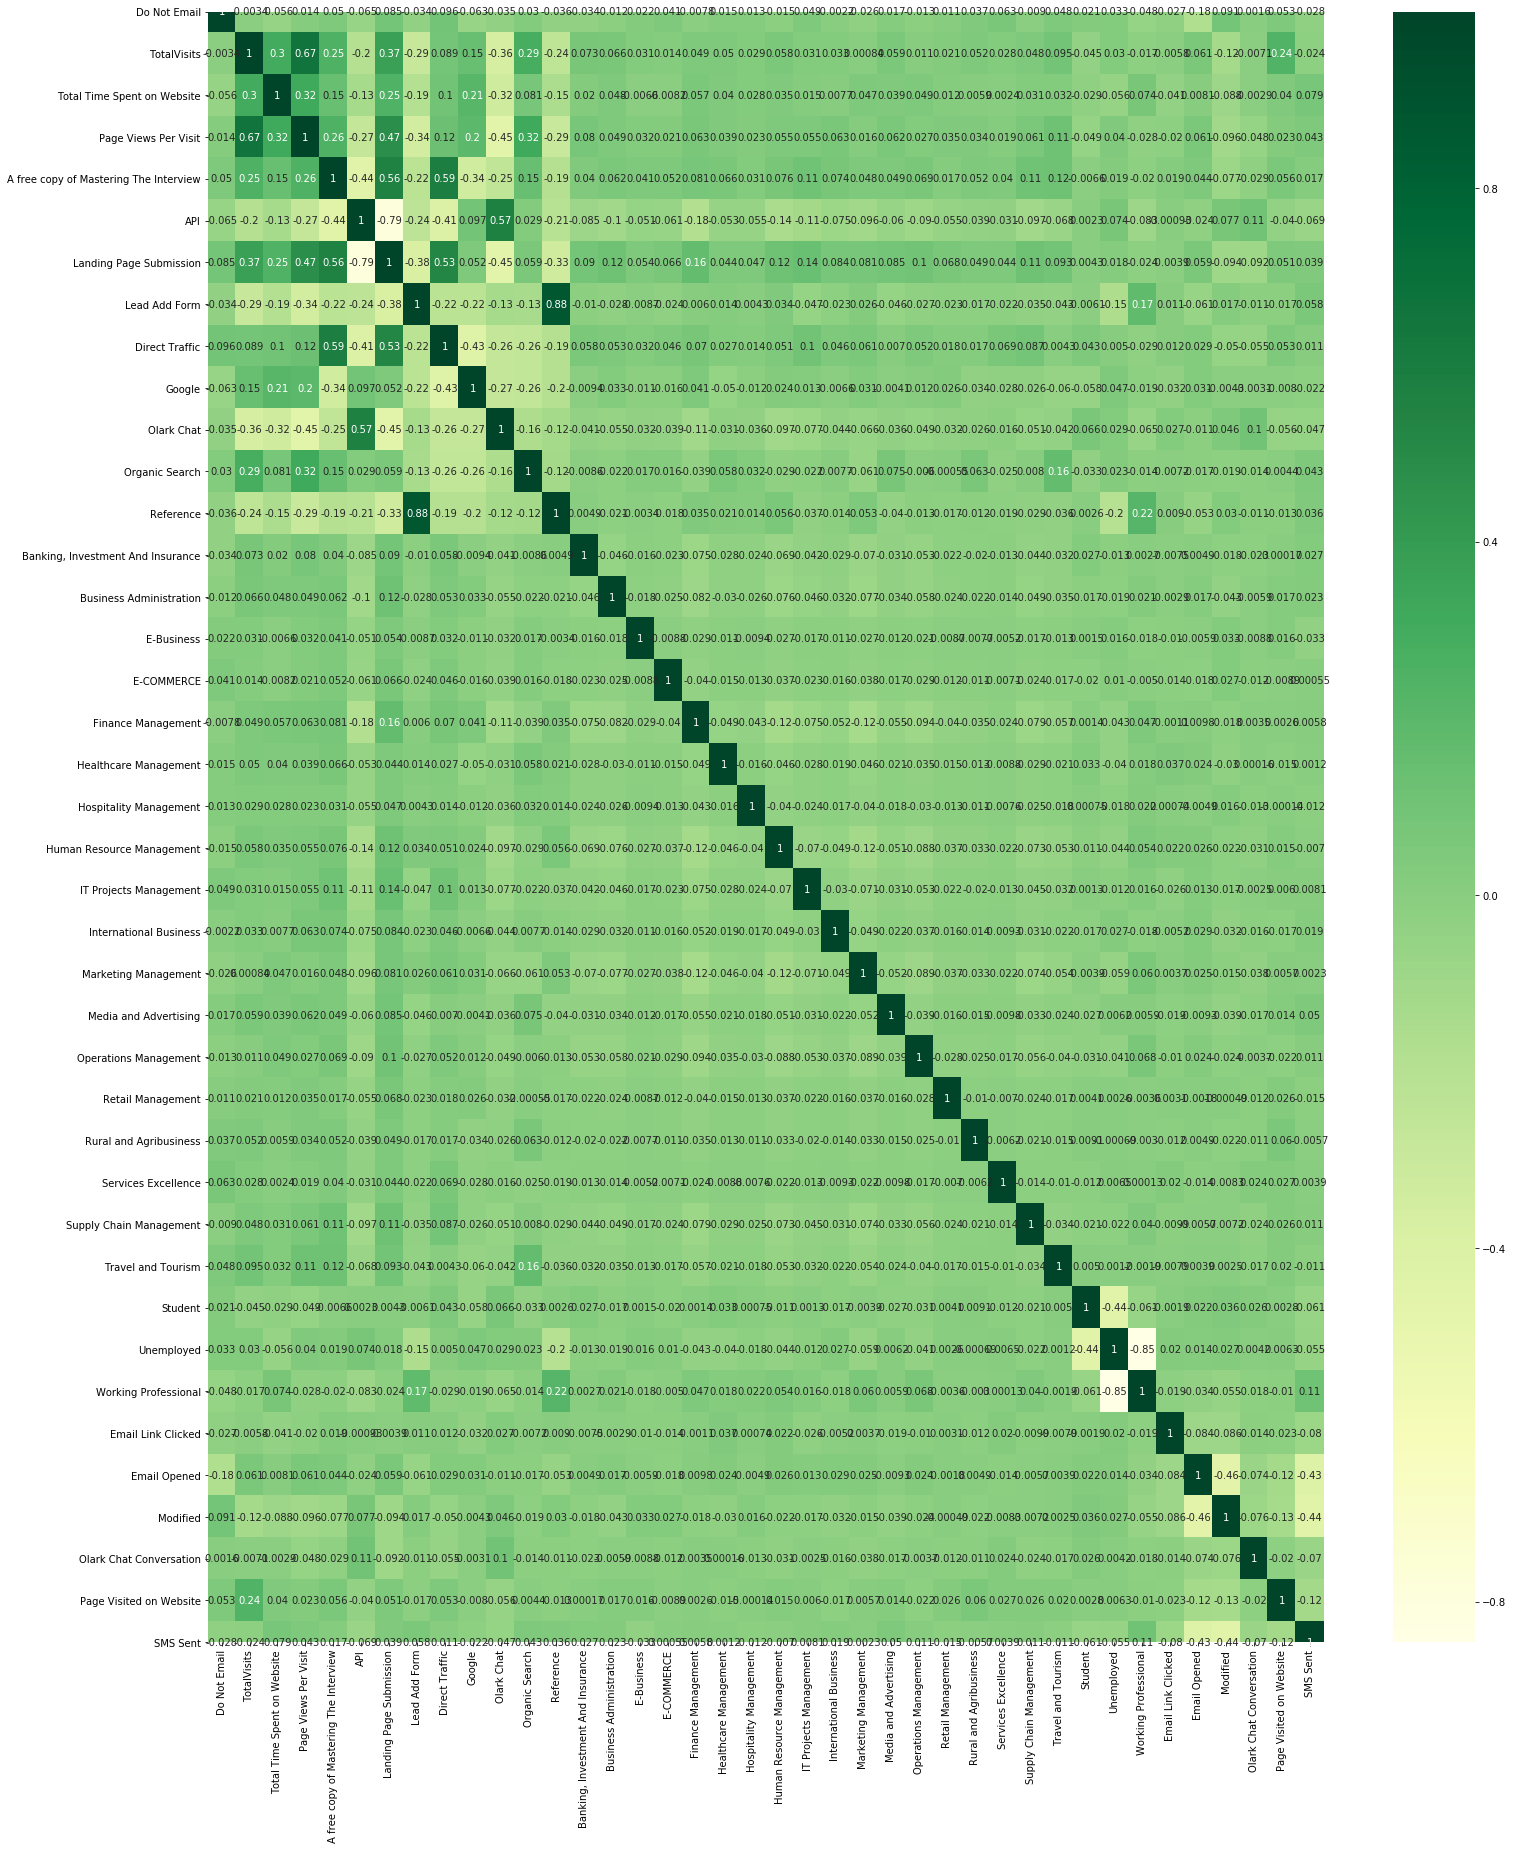

In [233]:
plt.figure(figsize= [25,30] )
sns.heatmap(X_train.corr(),annot = True,cmap='YlGn')


## Step 5: Model Building & Evaluation

We will use Logistic Regression to build the model. Logistic regression model building is similar to the linear regression model building but in logistic regression our target variable is a categorical variable (hence we do classification in logistic regression) and in linear regression we build the model with the target variable as continous variable. 

Logistic Regression predicts the probability of the outcome variable.

As the first part of model building, lets drop the target variable and the lead number continous variable from the X_train. Then we have to add the target variable to the y_train. 

### Subtask 5.1 Selecting Top 25 columns using RFE 

We have 40 features in our train dataset to build the model from. It is impossible to do regression analysis for all the features manually. Hence we will use **RFE (Recursive Feature elimination) method with 25 features** to start with. From there we will analyse the summary details by looking at their VIF and p-value and reduce the features further manually. 

In [234]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

cm = LinearRegression()
cm.fit(X_train,y_train)
rfe = RFE(cm,25)
rfe  = rfe.fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_,rfe.ranking_))





[('Do Not Email', True, 1),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('A free copy of Mastering The Interview', False, 15),
 ('API', False, 8),
 ('Landing Page Submission', True, 1),
 ('Lead Add Form', True, 1),
 ('Direct Traffic', False, 7),
 ('Google', False, 16),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 11),
 ('Reference', True, 1),
 ('Banking, Investment And Insurance', True, 1),
 ('Business Administration', False, 2),
 ('E-Business', True, 1),
 ('E-COMMERCE', True, 1),
 ('Finance Management', True, 1),
 ('Healthcare Management', True, 1),
 ('Hospitality Management', False, 6),
 ('Human Resource Management', True, 1),
 ('IT Projects Management', True, 1),
 ('International Business', False, 5),
 ('Marketing Management', True, 1),
 ('Media and Advertising', False, 10),
 ('Operations Management', True, 1),
 ('Retail Management', False, 3),
 ('Rural and Agribusiness', True, 1),
 ('Services Excellence', Fa

From the above output, we can see that the RFE has selected 25 features with Rank 1 and remaining columns eith rank ranging from 2 to 10. So RFE, has termed these 25 features with rank 1 as important features that explains the target varible and model building. 

In [235]:
# subsetting columns from  train dataset
col = X_train.columns[rfe.support_]
X_train = X_train[col]

# inspect
len(X_train.columns)

25

### Subtask 5.2 Build model using statsmodel 

In [236]:
# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4533
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2062.7
Date:                Sun, 06 Sep 2020   Deviance:                       4125.4
Time:                        20:22:56   Pearson chi2:                 5.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [237]:
# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
3,Lead Add Form,5.24
5,Reference,5.02
19,Unemployed,4.53
2,Landing Page Submission,4.32
21,Email Opened,1.94
22,Modified,1.93
4,Olark Chat,1.64
9,Finance Management,1.49
11,Human Resource Management,1.40
13,Marketing Management,1.38


**Observation:**
- Feature E commerce has high p- value, so we will drop that column. 


In [238]:
# drop column
X_train.drop('E-COMMERCE',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4534
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2064.2
Date:                Sun, 06 Sep 2020   Deviance:                       4128.4
Time:                        20:22:57   Pearson chi2:                 5.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
3,Lead Add Form,5.23
5,Reference,5.01
18,Unemployed,4.53
2,Landing Page Submission,4.22
20,Email Opened,1.94
21,Modified,1.93
4,Olark Chat,1.64
8,Finance Management,1.47
10,Human Resource Management,1.39
12,Marketing Management,1.36


Observation:
- All p - values with in range 
- Lead Add Form has highest vif , more than 5.
- Drop "Lead Add Form" 

In [239]:
# drop column
X_train.drop('Lead Add Form',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4535
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2186.3
Date:                Sun, 06 Sep 2020   Deviance:                       4372.6
Time:                        20:22:57   Pearson chi2:                 4.83e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
17,Unemployed,4.28
2,Landing Page Submission,4.11
19,Email Opened,1.94
20,Modified,1.93
3,Olark Chat,1.60
7,Finance Management,1.47
9,Human Resource Management,1.39
11,Marketing Management,1.36
4,Reference,1.33
12,Operations Management,1.23


Observation:
- "E-Business" has high p -value
- drop the column

In [240]:
# drop column
X_train.drop('E-Business',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4536
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2188.2
Date:                Sun, 06 Sep 2020   Deviance:                       4376.4
Time:                        20:22:57   Pearson chi2:                 4.83e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
16,Unemployed,4.28
2,Landing Page Submission,4.05
18,Email Opened,1.93
19,Modified,1.92
3,Olark Chat,1.60
6,Finance Management,1.45
8,Human Resource Management,1.37
10,Marketing Management,1.35
4,Reference,1.33
11,Operations Management,1.22


Observation:
- "Healthcare Management" has high p -value 
- drop the column

In [241]:
# drop column
X_train.drop('Healthcare Management',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4537
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2190.3
Date:                Sun, 06 Sep 2020   Deviance:                       4380.6
Time:                        20:22:58   Pearson chi2:                 4.84e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
15,Unemployed,4.28
2,Landing Page Submission,3.95
17,Email Opened,1.93
18,Modified,1.92
3,Olark Chat,1.60
6,Finance Management,1.42
7,Human Resource Management,1.35
9,Marketing Management,1.33
4,Reference,1.31
10,Operations Management,1.21


Observation :
- "IT Projects Management" has high p -value
- drop the column

In [242]:
# drop column
X_train.drop('IT Projects Management',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4538
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2192.3
Date:                Sun, 06 Sep 2020   Deviance:                       4384.5
Time:                        20:22:58   Pearson chi2:                 4.82e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
14,Unemployed,4.27
2,Landing Page Submission,3.67
16,Email Opened,1.93
17,Modified,1.92
3,Olark Chat,1.60
6,Finance Management,1.37
7,Human Resource Management,1.31
4,Reference,1.29
8,Marketing Management,1.29
9,Operations Management,1.18


Observation:
- "Finance Management" has high p- value
- Drop the column

In [243]:
# drop column
X_train.drop('Finance Management',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4539
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2193.8
Date:                Sun, 06 Sep 2020   Deviance:                       4387.7
Time:                        20:22:58   Pearson chi2:                 4.82e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
13,Unemployed,4.27
2,Landing Page Submission,3.24
16,Modified,1.92
15,Email Opened,1.92
3,Olark Chat,1.59
4,Reference,1.24
6,Human Resource Management,1.22
7,Marketing Management,1.21
12,Student,1.18
1,Total Time Spent on Website,1.17


Observation:
- "Operation Management" has high p- value
- Drop the column

In [244]:
# drop column
X_train.drop('Operations Management',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4540
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2195.2
Date:                Sun, 06 Sep 2020   Deviance:                       4390.3
Time:                        20:22:59   Pearson chi2:                 4.81e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
12,Unemployed,4.27
2,Landing Page Submission,3.10
15,Modified,1.92
14,Email Opened,1.92
3,Olark Chat,1.59
4,Reference,1.23
6,Human Resource Management,1.20
7,Marketing Management,1.19
11,Student,1.18
1,Total Time Spent on Website,1.17


Observation:
- "Travel and Tourism" has high p- value
- Drop the column

In [245]:
# drop column
X_train.drop('Travel and Tourism',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4541
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2196.3
Date:                Sun, 06 Sep 2020   Deviance:                       4392.5
Time:                        20:22:59   Pearson chi2:                 4.81e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
11,Unemployed,4.27
2,Landing Page Submission,3.06
14,Modified,1.92
13,Email Opened,1.92
3,Olark Chat,1.59
4,Reference,1.23
6,Human Resource Management,1.19
7,Marketing Management,1.18
10,Student,1.18
1,Total Time Spent on Website,1.17


Observation:
- "Supply chain Management" has high p- value
- Drop the column

In [246]:
# drop column
X_train.drop('Supply Chain Management',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4542
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2198.2
Date:                Sun, 06 Sep 2020   Deviance:                       4396.3
Time:                        20:22:59   Pearson chi2:                 4.80e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
10,Unemployed,4.27
2,Landing Page Submission,2.97
12,Email Opened,1.92
13,Modified,1.91
3,Olark Chat,1.59
4,Reference,1.22
6,Human Resource Management,1.18
9,Student,1.18
1,Total Time Spent on Website,1.17
7,Marketing Management,1.17


Observation:
- "Marketing Management" has high p- value
- Drop the column

In [247]:
# drop column
X_train.drop('Marketing Management',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4543
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2199.8
Date:                Sun, 06 Sep 2020   Deviance:                       4399.5
Time:                        20:22:59   Pearson chi2:                 4.81e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
9,Unemployed,4.27
2,Landing Page Submission,2.88
11,Email Opened,1.91
12,Modified,1.91
3,Olark Chat,1.58
4,Reference,1.20
8,Student,1.18
1,Total Time Spent on Website,1.17
6,Human Resource Management,1.15
0,Do Not Email,1.13


Observation:
- "Unemployed" has high vif
- Drop the column

In [248]:
# drop column
X_train.drop('Unemployed',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4544
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2314.1
Date:                Sun, 06 Sep 2020   Deviance:                       4628.2
Time:                        20:22:59   Pearson chi2:                 4.79e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
2,Landing Page Submission,2.07
10,Email Opened,1.57
11,Modified,1.52
3,Olark Chat,1.36
1,Total Time Spent on Website,1.17
4,Reference,1.15
6,Human Resource Management,1.15
0,Do Not Email,1.12
13,Page Visited on Website,1.07
5,"Banking, Investment And Insurance",1.06


Observation:
- "Student" has high p- value
- Drop the column

In [249]:
# drop column
X_train.drop('Student',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4545
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2315.1
Date:                Sun, 06 Sep 2020   Deviance:                       4630.2
Time:                        20:23:00   Pearson chi2:                 4.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
2,Landing Page Submission,2.07
9,Email Opened,1.56
10,Modified,1.51
3,Olark Chat,1.35
1,Total Time Spent on Website,1.17
4,Reference,1.15
6,Human Resource Management,1.15
0,Do Not Email,1.12
12,Page Visited on Website,1.07
5,"Banking, Investment And Insurance",1.06


In [250]:
print("No of columns left in dataset ",X_train.shape[1])

No of columns left in dataset  13


### Subtask 5.2 Model Evaluation in the y_train dataset.

From the previous model building process, we got a final set of 15 features that had p-value 0.000 and VIF's within the range. We can use that model to predict the y_train data. 

In a logistic regression curve, we get the probalities of the classification (in our case whether the leads are converted or not). This probability is given by the predict()function. 

We will use the predict() function on our X_train_sm dataset containing the final set of 15 features that have optimal p-value and VIF to get our y_train_pred, which is the predicted values of the converted leads.

In [251]:
# predict train dataset
y_train_pred = logml.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

In [252]:
# inspect churn probability
y_train_pred

array([0.16037302, 0.43217245, 0.2586908 , ..., 0.96685297, 0.38882452,
       0.10101273])

Creating a new DataFrame with actual Conversion Flags and the predicted probabilities. 

In [253]:
y_train_leadscore_df = pd.DataFrame({"LeadID":y_train.index,"Converted":y_train.values,"Conversion_prob":y_train_pred.round(2)})
y_train_leadscore_df.head()

,LeadID,Converted,Conversion_prob
0,442,0,0.16
1,5916,1,0.43
2,1814,0,0.26
3,3687,1,0.26
4,717,0,0.15


Now that we have created the above dataframe with Lead ID, Converted column (target column from the input dataset) and conversion_prob which is the probability value for that lead getting converted based on the features of the final model, lets proceed with getting the optimal cut off value so that we can get the final_preducted conversion value (0's and 1's).

#### Plotting ROC curve: Finding the optimal cut off.

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC (Area under the curve) we get. **A ROC Curve is simply a graph that we get which shows the trade-off between sensitivity and specificity**. 

A good model is the one where we have low False positive rate and high True positive rate. Hence when we plot a ROC cureve with our model, the curve should be rising towards the True postive rate that is marked on the x-axis not towards the false positive rate which is in y-axis. 

True positive Rate is same as the sensitivity measure 

False positive rate is (1 - Specificity).

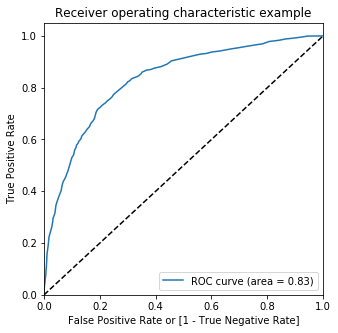

In [254]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_leadscore_df.Converted, y_train_leadscore_df.Conversion_prob)

The area under the ROC Curve is 0.83 which is good. This shows that we have a quite a good model. If the ROC Curve is more towards the upper left corner of the graph, then it means that the model is good. When its is more towards the 45 degree line that is drawn in the graph, it means that the model is not that good for prediction. 

Lets also check the sensitivity and specificity tradeoff to find the optimal cutoff.

In [255]:
# Let's create columns with different probability cutoffs 

for cutoff in range(1,10):
  
  y_train_leadscore_df['predicted'+str(cutoff)] = y_train_leadscore_df['Conversion_prob'].apply(lambda x:1 if x > (cutoff/10) else 0)
y_train_leadscore_df.head()


,LeadID,Converted,Conversion_prob,predicted1,predicted2,predicted3,predicted4,predicted5,predicted6,predicted7,predicted8,predicted9
0,442,0,0.16,1,0,0,0,0,0,0,0,0
1,5916,1,0.43,1,1,1,1,0,0,0,0,0
2,1814,0,0.26,1,1,0,0,0,0,0,0,0
3,3687,1,0.26,1,1,0,0,0,0,0,0,0
4,717,0,0.15,1,0,0,0,0,0,0,0,0


Here we can see that when we have the different values of probability cut off(from 1 to 10), the predicted_probability gets assigned as 1  when the conversion_prob is greater than cut-off/10 (customers getting converted to potential leads) and those cutoff/10 is getting assigned as 0 (customers not getting converted to leads).

Now that we have the probabilities predicted for the train dataset for all these arbitrary cut off values. 

#### Creating Sensitivity, Specificity and Accuracy dataframe

In [256]:
cutoff_df = pd.DataFrame(columns = ["cut-off",'accuracy','sensitivity','specificity'])
for i in range(1,10):
  cutoff = i/10  
  cm = metrics.confusion_matrix(y_train_leadscore_df.Converted,y_train_leadscore_df["predicted"+str(i)])
  total=sum(sum(cm)) 
  accuracy = (cm[0,0]+cm[1,1])/total
  sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
  specificity = cm[0,0]/(cm[0,0]+cm[0,1])
  cutoff_df.loc[i-1] = [cutoff,accuracy,sensitivity,specificity]

cutoff_df

,cut-off,accuracy,sensitivity,specificity
0,0.1,0.536521,0.990926,0.111253
1,0.2,0.638737,0.945554,0.351592
2,0.3,0.736565,0.874773,0.607219
3,0.4,0.757622,0.827132,0.692569
4,0.5,0.763764,0.716425,0.808068
5,0.6,0.739417,0.601633,0.868365
6,0.7,0.700812,0.468240,0.918471
7,0.8,0.665716,0.357532,0.954140
8,0.9,0.603422,0.196007,0.984713


From the above table with the different probability cut off's we can see that when the cut off is near 0.4 as the values of different measures - Accuracy, Sensitivity and Specificity are all more or less nearby. Hence we can use this value as our probability cut off. 

Lets also plot this in a graph and check the optimal cut off point. 

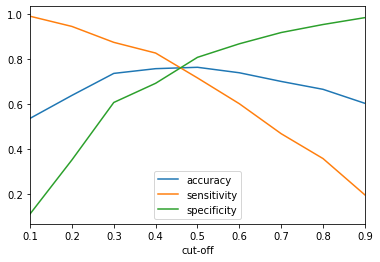

In [257]:
# plotting all three metrics together

cutoff_df.plot.line(x= 'cut-off',y = ['accuracy','sensitivity','specificity'])
plt.show()

**As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.**

Lets again find the predicted conversion again with the cut off as 0.42.

In [258]:
# Getting the final dataframe with the predicted conversion value with the cut off as 0.42

coff = 0.42  
y_train_leadscore_final_df = pd.DataFrame(y_train_leadscore_df[['LeadID','Converted','Conversion_prob']])
y_train_leadscore_final_df['predicted'] = y_train_leadscore_final_df['Conversion_prob'].apply(lambda x:1 if x > coff else 0)


# Creating the confusion matrix with the cut off as 0.42.

cm1 = metrics.confusion_matrix(y_train_leadscore_final_df.Converted,y_train_leadscore_final_df['predicted'])
print('*******The Confusion matrix with the cutoff as 0.42 is:******')
print(cm1)

# Getting the metrics: Sensitivity, Specificity and Accuracy.

sen = cm1[1,1]/(cm1[1,1]+cm1[1,0])

total=sum(sum(cm1)) 
acc = (cm1[0,0]+cm1[1,1])/total

spec = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('\n')
print("Accuracy    : ",acc)
print("Sensitiviy  : ",sen)
print("Specificity : ",spec)
print()

TP = cm1[1,1] # true positive 
TN = cm1[0,0] # true negatives
FP = cm1[0,1] # false positives
FN = cm1[1,0] # false negatives

y_train_leadscore_final_df.head()

*******The Confusion matrix with the cutoff as 0.42 is:******
[[1665  690]
 [ 411 1793]]


Accuracy    :  0.7584996709804782
Sensitiviy  :  0.8135208711433757
Specificity :  0.7070063694267515



,LeadID,Converted,Conversion_prob,predicted
0,442,0,0.16,0
1,5916,1,0.43,1
2,1814,0,0.26,0
3,3687,1,0.26,0
4,717,0,0.15,0


Here we can see that when we have the probability cut off as 0.42, all the Conversion_prob values greater than 0.42 gets assigned as 1 (customers getting converted to potential leads) and those below 0.42 is getting assigned as 0 (customers not getting converted to leads).

Now that we have the probabilities predicted for the train dataset for a cut off of 0.42 lets used this against our model to get the different measures. 

With the cut off as 0.42, we are getting the model accuracy as 75.8%. Accuracy says about the model performance for both the classes i.e. both converted and non-converted leads classes.

Accuracy = Correctly predicted leads/Total no. of leads = (TN+TP)/(TN+FN+TP+FP).

Sensitivity = True Positives/Total number of Actual Positives = TP/(TP+FN).

Specificity = True Negatives/Total number of Actual Negatives = TN/(TN+FP).

#### True Positives (TP): These are leads in which we predicted converted (Customers will convert), and Customers actually Converted i.e 1793  
#### True Negatives (TN): We predicted no(customers will not convert) and they don’t convert i.e 1665  
#### False Positives (FP): We predicted yes they will Convert, but they don’t convert. (Also known as a “Type I error.”) i.e 690  
#### False Negatives (FN): We predicted they will not be converted, but they actually converted (Also known as a “Type II error.”) i.e 411

#### Precision-Recall Tradeoff

Now lets find the threshold using the Precision-Recall view.

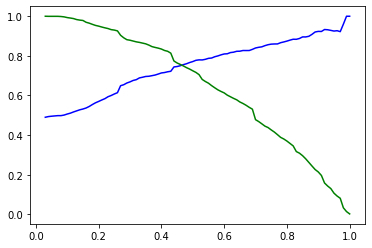

In [259]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_leadscore_final_df.Converted, y_train_leadscore_final_df.Conversion_prob)
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g-")
plt.show()

Here again, we are getting the optimal cut off as 0.42. Hence this is the trade off between precision and recall.

#### Thus we can safely choose to consider any Prospect Lead with Conversion Probability higher than 42% to be a hot Lead

In [260]:
# Getting the final dataframe with the predicted conversion value with the cut off as 0.42

coff = 0.42  
#y_train_leadscore_final_df = pd.DataFrame(y_train_leadscore_df[['LeadID','Converted','Conversion_prob']])
y_train_leadscore_final_df['predicted_pr_rc'] = y_train_leadscore_final_df['Conversion_prob'].apply(lambda x:1 if x > coff else 0)
y_train_leadscore_final_df.head()

,LeadID,Converted,Conversion_prob,predicted,predicted_pr_rc
0,442,0,0.16,0,0
1,5916,1,0.43,1,1
2,1814,0,0.26,0,0
3,3687,1,0.26,0,0
4,717,0,0.15,0,0


From the above dataframe, the 'predicted'column is the predicted_conversion values from the sensitivity-specificity trade off and 'predicted_pr_rc' is the predicted conversion values got from the precision-recall tradeoff. 

In [261]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_leadscore_final_df.Converted, y_train_leadscore_final_df.predicted_pr_rc)

0.7584996709804782

In [262]:
# Let's create the confusion matrix once again

cm2 = metrics.confusion_matrix(y_train_leadscore_final_df.Converted, y_train_leadscore_final_df.predicted_pr_rc )
cm2

array([[1665,  690],
       [ 411, 1793]], dtype=int64)

In [263]:
# Getting the metrics: Precision, Recall and Accuracy.

total=sum(sum(cm2)) 
acc = (cm2[0,0]+cm2[1,1])/total

TP = cm2[1,1] # true positive 
TN = cm2[0,0] # true negatives
FP = cm2[0,1] # false positives
FN = cm2[1,0] # false negatives

# lets calculate the Precision
precision = TP/(TP+FP)

# Lets calculate Recall
TP/(TP+FN)

print('\n')
print("Accuracy    : ",acc)
print("Precision  : ",precision)
print("Recall : ",spec)
print()




Accuracy    :  0.7584996709804782
Precision  :  0.7221103503826017
Recall :  0.7070063694267515



#### Precision: Probability that a predicted 'Converted' is actually a 'Yes'. Precision is given by True Positive/(True Positive + False Positive)

#### Recall:  Probability that an actual 'Converted' case is predicted correctly. Recall is given by True Positive/(True Positive + False Negative).

#### True Positives (TP): These are leads in which we predicted converted (Customers will convert), and Customers actually Converted i.e 1793  
#### True Negatives (TN): We predicted no(customers will not convert) and they don’t convert i.e 1665  
#### False Positives (FP): We predicted yes they will Convert, but they don’t convert. (Also known as a “Type I error.”) i.e 690  
#### False Negatives (FN): We predicted they will not be converted, but they actually converted (Also known as a “Type II error.”) i.e 411

#### Conclusion: We will use threshold value of 0.42 in our Test data. Reason for this decision is as follows:
>> We have got Accuracy score of 75.8%. Accuracy is used when the True Positives and True negatives are more important.
>> We have gota precision of 72.2% and Recall of 70.7%. Sensitivity metricis also at 81.3% and the specificity is at 70.7% Sensitivity is more important than Specificity in our business case because we would like to have less False Positives (we would like to predict customers in less numbers who will convert but in reality they don't convert) in trade off to have more False Negatives (customers likely to be predicted not converted but in reality they are converted). Meaning, getting a False Positive is very costly for our case, and a False Negative is not as much.

In [264]:
#Generate Lead score variable
y_train_leadscore_final_df['Lead_Score'] = round(y_train_leadscore_final_df['Conversion_prob']*100)
y_train_leadscore_final_df.head()


,LeadID,Converted,Conversion_prob,predicted,predicted_pr_rc,Lead_Score
0,442,0,0.16,0,0,16.0
1,5916,1,0.43,1,1,43.0
2,1814,0,0.26,0,0,26.0
3,3687,1,0.26,0,0,26.0
4,717,0,0.15,0,0,15.0


### Subtask 5.3 Test Data Preparation

Till now, we have been using our train dataset in our model to learn about the lead conversion rate, predicted conversion, its probabilities, optimal cut off etc.

Now we need to use this model in our test set to make the predictions.

For the train set, we scaled the numerical variables in the X_train dataset. Similarly we have to scale the test dataset with the scaled values of the training dataset. 

In [265]:
# scaling

num_col = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website'] 
X_test[num_col] = scaler.transform(X_test[num_col])
X_test [num_col].describe()

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,1955.000000,1955.000000,1955.000000
mean,0.049292,0.056640,0.051414
std,1.033288,1.037730,1.016917
min,-1.031329,-1.219285,-0.945690
25%,-0.437063,-0.715575,-0.864235
50%,-0.139931,-0.211864,-0.396749
75%,0.454335,0.795557,0.931336
max,5.208459,4.321530,2.762323


In [266]:
# selecting final set of columns in test set 

X_test = X_test[X_train.columns]
X_test.head()

,Do Not Email,Total Time Spent on Website,Landing Page Submission,Olark Chat,Reference,"Banking, Investment And Insurance",Human Resource Management,Rural and Agribusiness,Email Link Clicked,Email Opened,Modified,Olark Chat Conversation,Page Visited on Website
6386,0,-0.945690,0,1,0,0,0,0,0,0,0,0,0
2402,0,0.587805,1,0,0,0,0,0,0,1,0,0,0
8737,0,-0.407373,1,0,0,0,0,0,0,0,0,0,1
5026,0,-0.733197,0,0,0,0,1,0,0,0,0,0,0
6422,0,-0.945690,0,0,0,0,0,0,0,0,0,0,0


In [144]:
X_test.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Landing Page Submission', 'Olark Chat', 'Reference',
       'Banking, Investment And Insurance', 'Human Resource Management',
       'Rural and Agribusiness', 'Email Link Clicked', 'Email Opened',
       'Modified', 'Olark Chat Conversation', 'Page Visited on Website'],
      dtype='object')

### Subtask 5.4 Test Data Prediction.

In [267]:
# predict the test set
y_test_pred_array = logml.predict(sm.add_constant(X_test))
y_test_pred_array = y_test_pred_array.values.reshape(-1)

# converting array to dataframe
y_test_leadscore_df = pd.DataFrame({"LeadID":y_test.index,"Converted":y_test.values,"Conversion_prob":y_test_pred_array.round(2)})
y_test_leadscore_df.head()

,LeadID,Converted,Conversion_prob
0,6386,1,0.69
1,2402,1,0.48
2,8737,0,0.19
3,5026,1,0.67
4,6422,1,0.52


In [268]:
# create predicted column  with cut off 0.42

cutoff = 0.42 
y_test_leadscore_df['predicted'] = y_test_leadscore_df['Conversion_prob'].apply(lambda x:1 if x > cutoff else 0)
y_test_leadscore_df.head()

,LeadID,Converted,Conversion_prob,predicted
0,6386,1,0.69,1
1,2402,1,0.48,1
2,8737,0,0.19,0
3,5026,1,0.67,1
4,6422,1,0.52,1


### Subtask 5.5 Evaluate Model
- Confusion metrics
- Accuracy
- Sensitivity
- Specificity


In [270]:
# confusion matrix , accuracy , specificity and sensiticity calculation

cutoff = 0.42
test_cm = metrics.confusion_matrix(y_test_leadscore_df.Converted,y_test_leadscore_df["predicted"])
print('********The confusion matrix for Test data*************')
print(test_cm)
print()

#accuracy
total=sum(sum(test_cm)) 
accuracy = (test_cm[0,0]+test_cm[1,1])/total
print("Accuracy = ",accuracy)

#sensitivity
sensitivity = test_cm[1,1]/(test_cm[1,1]+test_cm[1,0])
print("Sensitivity = ",sensitivity)

# specificity
specificity = test_cm[0,0]/(test_cm[0,0]+test_cm[0,1])
print("Specificity = ",specificity)


********The confusion matrix for Test data*************
[[683 314]
 [191 767]]

Accuracy =  0.7416879795396419
Sensitivity =  0.8006263048016702
Specificity =  0.6850551654964895


Observation:
Comparing to train dataset
- Accuracy train = 0.75 ; test  = 0.73
- Sensitivity train = 0.81 ; test = 0.80
- Specificity train = 0.70 ; test = 0.68

### Subtask 5.6 ROC curve and its area for test dataset

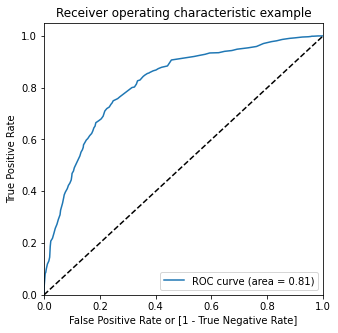

In [ ]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_leadscore_df.Converted, y_test_leadscore_df.Conversion_prob)

### Subtask 5.7 Generate Lead Score Variable

In [ ]:

y_test_leadscore_df['Lead_Score'] = y_test_leadscore_df['Conversion_prob']*100
y_test_leadscore_df.head()

,LeadID,Converted,Conversion_prob,predicted,Lead_Score
0,6386,1,0.69,1,69.0
1,2402,1,0.48,1,48.0
2,8737,0,0.19,0,19.0
3,5026,1,0.67,1,67.0
4,6422,1,0.52,1,52.0


So, We have noe created the dataframe for the test data with the lead score values for 100, for all the leads with their predicted probabilities. The sensitivity and specificity of the model with the test data was also calculated. 

- Accuracy train = 0.75 ; test = 0.73
- Sensitivity train = 0.81 ; test = 0.80
- Specificity train = 0.70 ; test = 0.68

## Recommendation to the X-Education based on our model:

**The sales team of the X-Education should focus on the leads:**
 - who have been tagged as referral leads. The model says that these leads have the potential to get converted as HOT LEADS(paying customers)
 - who spend more time in the website. 
 - who are in the Rural & Agricultural specialization.
 - who have been contacted through olark Chat mode.
 - who are in Banking, Investement and Insurance Specialization.
